В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [8]:
cd C:\Users\Jools\Documents\DS\data

C:\Users\Jools\Documents\DS\data


In [9]:
cars_df = pd.read_csv ('cars.csv')
cars_df.head(5)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [11]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
?pd.DataFrame.info

Signature:
pd.DataFrame.info(
    self,
    verbose: 'bool | None' = None,
    buf: 'WriteBuffer[str] | None' = None,
    max_cols: 'int | None' = None,
    memory_usage: 'bool | str | None' = None,
    show_counts: 'bool | None' = None,
) -> 'None'
Docstring:
Print a concise summary of a DataFrame.

This method prints information about a DataFrame including
the index dtype and columns, non-null values and memory usage.

Parameters
----------
verbose : bool, optional
    Whether to print the full summary. By default, the setting in
    ``pandas.options.display.max_info_columns`` is followed.
buf : writable buffer, defaults to sys.stdout
    Where to send the output. By default, the output is printed to
    sys.stdout. Pass a writable buffer if you need to further process
    the output.
max_cols : int, optional
    When to switch from the verbose to the truncated output. If the
    DataFrame has more than `max_cols` columns, the truncated output
    is used. By default, the setting in


In [12]:
cars_df.shape

(100, 13)

In [13]:
cars_df.dtypes

Car_ID                int64
Brand                object
Model                object
Year                  int64
Kilometers_Driven     int64
Fuel_Type            object
Transmission         object
Owner_Type           object
Mileage               int64
Engine                int64
Power                 int64
Seats                 int64
Price                 int64
dtype: object

In [14]:
for col in cars_df.select_dtypes(include='object'):
    print(f"{col}: {cars_df[col].nunique()} категорій → {cars_df[col].unique()[:5]}")

Brand: 11 категорій → ['Toyota' 'Honda' 'Ford' 'Maruti' 'Hyundai']
Model: 58 категорій → ['Corolla' 'Civic' 'Mustang' 'Swift' 'Sonata']
Fuel_Type: 2 категорій → ['Petrol' 'Diesel']
Transmission: 2 категорій → ['Manual' 'Automatic']
Owner_Type: 3 категорій → ['First' 'Second' 'Third']


В наборі даних ми маємо 13 колонок, 5 з яких є категоріальними.
- Маємо дві бінарні колонки Fuel_Type та Transmission.
- Колонки Brand, Model та Owner_Type є мультикатегоріалними.
- Owner_Type має лише три категорії, які можна впорядкувати 'First' 'Second' 'Third'

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [17]:
#не враховуємо Car ID з очевидних причин та Model, оскільки ця зміння занадто мультакатегорійна 
selected_features = [
    'Brand',
    'Year',
    'Kilometers_Driven',
    'Fuel_Type',
    'Transmission',
    'Owner_Type',
    'Mileage',
    'Engine',
    'Power',
    'Seats'
]

In [18]:
X, y = cars_df[selected_features], cars_df['Price']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [20]:
X_train

,Brand,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
83,Volkswagen,2019,22000,Petrol,Automatic,Second,18,1498,148,5
55,Audi,2018,28000,Diesel,Automatic,First,17,1968,187,5
26,Audi,2018,28000,Petrol,Automatic,First,15,1984,241,5
54,Volkswagen,2017,32000,Petrol,Manual,Second,18,1598,103,5
19,Mercedes,2017,26000,Petrol,Automatic,Second,12,1991,241,5
...,...,...,...,...,...,...,...,...,...,...
3,Maruti,2020,30000,Diesel,Manual,Third,23,1248,74,5
2,Ford,2017,20000,Petrol,Automatic,First,10,4951,395,4
6,Mahindra,2018,45000,Diesel,Automatic,Second,15,2179,140,7
27,BMW,2019,22000,Diesel,Automatic,Second,18,1995,187,5


In [21]:
X_test.shape

(20, 10)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [23]:
cars_df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    52
Diesel    48
Name: count, dtype: int64

In [24]:
fuel_type_codes = {'Diesel': 0, 'Petrol': 1}
X_train['Fuel_Type_Code'] = X_train['Fuel_Type'].map(fuel_type_codes)
X_test['Fuel_Type_Code'] = X_test['Fuel_Type'].map(fuel_type_codes)

In [25]:
cars_df['Transmission'].value_counts()

Transmission
Automatic    57
Manual       43
Name: count, dtype: int64

In [26]:
transmission_type_codes = {'Manual': 0, 'Automatic': 1}
X_train['Transmission_Code'] = X_train['Transmission'].map(transmission_type_codes)
X_test['Transmission_Code'] = X_test['Transmission'].map(transmission_type_codes)

In [27]:
X_train['Brand'] = cars_df.loc[X_train.index, 'Brand']
X_test['Brand'] = cars_df.loc[X_test.index, 'Brand']

In [28]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder(handle_unknown='ignore', sparse_output=False)
enc.fit(X_train[['Brand']])
enc.categories_

brand_train_encoded = enc.transform(X_train[['Brand']])
brand_test_encoded = enc.transform(X_test[['Brand']])

brand_cols = enc.get_feature_names_out(['Brand'])
brand_train_df = pd.DataFrame(brand_train_encoded, columns=brand_cols, index=X_train.index)
brand_test_df = pd.DataFrame(brand_test_encoded, columns=brand_cols, index=X_test.index)

X_train = X_train.drop(columns=['Brand'])
X_test = X_test.drop(columns=['Brand'])

X_train = pd.concat([X_train, brand_train_df], axis=1)
X_test = pd.concat([X_test, brand_test_df], axis=1)

In [29]:
X_train

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,...,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen
83,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
55,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,2020,30000,Diesel,Manual,Third,23,1248,74,5,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2017,20000,Petrol,Automatic,First,10,4951,395,4,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2018,45000,Diesel,Automatic,Second,15,2179,140,7,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27,2019,22000,Diesel,Automatic,Second,18,1995,187,5,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [32]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes
83,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes
17,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [34]:
X_train = X_train.select_dtypes(include=['number'])
X_train

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes
83,2019,22000,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,2018,28000,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,2018,28000,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,2017,32000,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,2017,26000,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,2020,30000,23,1248,74,5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
2,2017,20000,10,4951,395,4,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2018,45000,15,2179,140,7,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
27,2019,22000,18,1995,187,5,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [35]:
train_df = pd.concat([X_train, y_train], axis=1)

In [36]:
corr_matrix = train_df.corr(numeric_only=True)
target_corr = corr_matrix['Price'].drop('Price')  # виключити саму себе
strong_corr = target_corr[abs(target_corr) > 0.5]
print(strong_corr.sort_values(ascending=False))

Power                0.849137
Engine               0.710561
Transmission_Code    0.680731
Mileage             -0.638404
Name: Price, dtype: float64


Бачимо, що кореляція більше 0,5 є лише з колонками Power, Engine, Transmissio, Mileage.

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [39]:
X_test = X_test.select_dtypes(include=['number'])

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [87]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

rmse_train = root_mean_squared_error(y_train, y_train_pred)
rmse_test = root_mean_squared_error(y_test, y_test_pred)

print(f"Train RMSE: {rmse_train:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")

Train RMSE: 210342.80
Test RMSE: 259601.27


In [96]:
feature_names = X_train.columns
coefficients = model.coef_

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df)

              Feature    Coefficient
8          Brand_Audi  758803.045074
15     Brand_Mercedes  733974.724346
9           Brand_BMW  730326.849008
13     Brand_Mahindra -574912.608159
12      Brand_Hyundai -505043.272173
14       Brand_Maruti -394216.231104
6      Fuel_Type_Code -370607.514476
10         Brand_Ford -305098.169140
18   Brand_Volkswagen -258785.164313
7   Transmission_Code  236367.637699
11        Brand_Honda -189002.505876
17       Brand_Toyota  130457.503230
16         Brand_Tata -126504.170893
19   Owner_Type_Codes   66278.306579
2             Mileage  -38666.712435
0                Year  -10353.959456
4               Power    6140.756458
5               Seats   -2353.012257
3              Engine     -37.585874
1   Kilometers_Driven     -10.874437


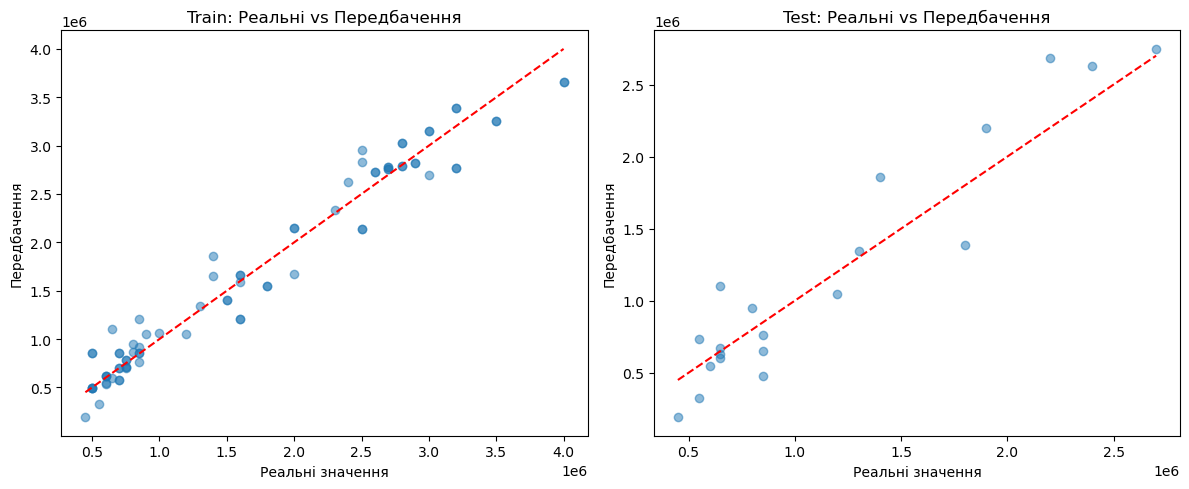

In [89]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.title("Train: Реальні vs Передбачення")
plt.xlabel("Реальні значення")
plt.ylabel("Передбачення")

# Тестові
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Test: Реальні vs Передбачення")
plt.xlabel("Реальні значення")
plt.ylabel("Передбачення")

plt.tight_layout()
plt.show()


Якість моделі на тренувальних даних висока, тобто вона добре вивчає залежності.

На тестових даних точність нижча, отже є простір для покращень.

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [94]:
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

LinearRegression()

In [100]:
y_train_pred = model_scaled.predict(X_train_scaled)
y_test_pred = model_scaled.predict(X_test_scaled)

rmse_train = root_mean_squared_error(y_train, y_train_pred)
rmse_test = root_mean_squared_error(y_test, y_test_pred)

print(f"Train RMSE: {rmse_train:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")

feature_names = X_train.columns
coefficients = model.coef_

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df)

Train RMSE: 210342.80
Test RMSE: 259601.27
              Feature    Coefficient
8          Brand_Audi  758803.045074
15     Brand_Mercedes  733974.724346
9           Brand_BMW  730326.849008
13     Brand_Mahindra -574912.608159
12      Brand_Hyundai -505043.272173
14       Brand_Maruti -394216.231104
6      Fuel_Type_Code -370607.514476
10         Brand_Ford -305098.169140
18   Brand_Volkswagen -258785.164313
7   Transmission_Code  236367.637699
11        Brand_Honda -189002.505876
17       Brand_Toyota  130457.503230
16         Brand_Tata -126504.170893
19   Owner_Type_Codes   66278.306579
2             Mileage  -38666.712435
0                Year  -10353.959456
4               Power    6140.756458
5               Seats   -2353.012257
3              Engine     -37.585874
1   Kilometers_Driven     -10.874437


Найвпливовіші ознаки — це преміум-бренди: Brand_Audi, Brand_Mercedes, Brand_BMW — вони суттєво збільшують передбачувану ціну. Натомість бренди на кшталт Mahindra, Hyundai, Maruti — зменшують її.

Тип пального має негативний коефіцієнт — дизель знижує ціну в порівнянні з бензином.

Автомобілі на автоматі підвищують ціну, порівняно із механікою і сильно впливають на неї..

Змінні на кшталт Mileage, Year, Power мають незначний вплив після масштабування — їхній вклад у передбачення невеликий.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [128]:
import statsmodels.api as sm

Y = y_train
X = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=y_train.index)
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

const                1.680000e+06
Year                -1.160426e+04
Kilometers_Driven   -9.971396e+04
Mileage             -1.318846e+05
Engine              -2.468308e+04
Power                5.000005e+05
Seats               -1.744049e+03
Fuel_Type_Code      -1.852458e+05
Transmission_Code    1.151534e+05
Brand_Audi           2.061231e+05
Brand_BMW            2.081051e+05
Brand_Ford          -1.190692e+05
Brand_Honda         -6.311234e+04
Brand_Hyundai       -1.519161e+05
Brand_Mahindra      -1.409316e+05
Brand_Maruti        -1.127867e+05
Brand_Mercedes       2.092577e+05
Brand_Tata          -6.555849e+04
Brand_Toyota         1.761943e+04
Brand_Volkswagen    -9.339136e+04
Owner_Type_Codes     4.333507e+04
dtype: float64

In [130]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     73.14
Date:                Sat, 21 Jun 2025   Prob (F-statistic):           2.34e-34
Time:                        22:58:16   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2228.
Df Residuals:                      60   BIC:                             2276.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.72e+0

Статистично значущими є більшість ознак, окрім Year, Engine, Seats, Owner_Type_Codes, Kilometers_Driven, Brand_Honda, Brand_Tata, Brand_Toyota.

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [156]:
X_train_sig = X_train.drop(['Year', 'Engine', 'Seats', 'Owner_Type_Codes', 'Brand_Toyota', 'Kilometers_Driven', 'Brand_Honda', 'Brand_Tata'], axis=1)

Y = y_train
X = X_train_sig
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

const                1.233788e+06
Mileage             -4.192834e+04
Power                5.595638e+03
Fuel_Type_Code      -2.675118e+05
Transmission_Code    2.690545e+05
Brand_Audi           8.322983e+05
Brand_BMW            9.335321e+05
Brand_Ford          -1.536554e+05
Brand_Hyundai       -3.900961e+05
Brand_Mahindra      -3.917601e+05
Brand_Maruti        -2.114290e+05
Brand_Mercedes       8.757789e+05
Brand_Volkswagen    -8.405816e+04
dtype: float64

In [158]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     109.4
Date:                Sat, 21 Jun 2025   Prob (F-statistic):           4.12e-39
Time:                        23:20:23   Log-Likelihood:                -1100.4
No. Observations:                  80   AIC:                             2227.
Df Residuals:                      67   BIC:                             2258.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.234e+06   2.71e+0

Після видалення незначущих ознак R² та Adj. R² трішечки зменшились, що значить про невеличке погіршення моделі, втім вона все ще є хорошою

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [165]:
X_train_sig = X_train.drop(['Year', 'Engine', 'Seats', 'Owner_Type_Codes', 'Brand_Toyota'], axis=1)

Y = y_train
X = X_train_sig
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     97.03
Date:                Sat, 21 Jun 2025   Prob (F-statistic):           4.85e-38
Time:                        23:22:34   Log-Likelihood:                -1094.7
No. Observations:                  80   AIC:                             2221.
Df Residuals:                      64   BIC:                             2260.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.614e+06   3.35e+0

В даній моделі R2 є трішки меншим за першу модель зі всіма ознаками (всього на 0.001), а Adj. R2 навпаки покращився в порівнянні з першою моделлю. Саме цю третю модель я б залишила для використання, бо вона балансує між R2 та Adj. R2 